In [8]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
load("environment/brain_sim_nodtu/mode=gc_bias/mapDf.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/updated/yNS.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/updated/yS.RData")

In [10]:
tr <- read.tree("/fs/cbcb-lab/rob/students/noor/Uncertainity/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/out_term_temp/1_1/group_nwk.txt")
tr <- mergeTree(tr, se = mapDf)
yR <- yNS[tr$tip,]
mB <- mergeLeaves(tr, yR)
yR <- mB[["ySwish"]]
tr <- mB[["tree"]]
yAgg <- prepSwish(tr, yR)

In [21]:
nL <- length(tr$tip)
depth <- node.depth(tr,2)
modDep <- depth
modDep[depth >=7] = 7
innNodes <- nL+1:tr$Nnode
childNodes <- Descendants(tr, innNodes, "child")

infRepIdx <- grep("infRep",assayNames(yAgg))
infReps <- assays(yAgg)[infRepIdx]
infReps <- abind::abind(as.list(infReps), along=3)

yAgg <- yAgg[,1]
yAgg <- computeInfRV(yAgg, meanVariance = F)

In [25]:
infMean <- rowMeans(infReps[,1,])
meanDiff <- sapply(seq_along(innNodes), function(i) {
    cM <- infMean[childNodes[[i]]]
    (infMean[innNodes[i]]-min(cM))/infMean[innNodes[i]]
})

In [32]:
dfInf <- data.frame(type="infRVRed", depth=modDep[nL+1:tr$Nnode], infRV = mcols(yAgg)[nL+1:tr$Nnode,1],
                   meanDiff = meanDiff, expCat = sapply(infMean[nL+1:tr$Nnode], function(x) {
                       if(x < 10)
                           return("10")
                       else if(x < 100)
                           return("100")
                       else if(x < 1000)
                           return("1000")
                       else if(x < 10000)
                           return("10000")
                       else
                           return("everything else")
                   }))

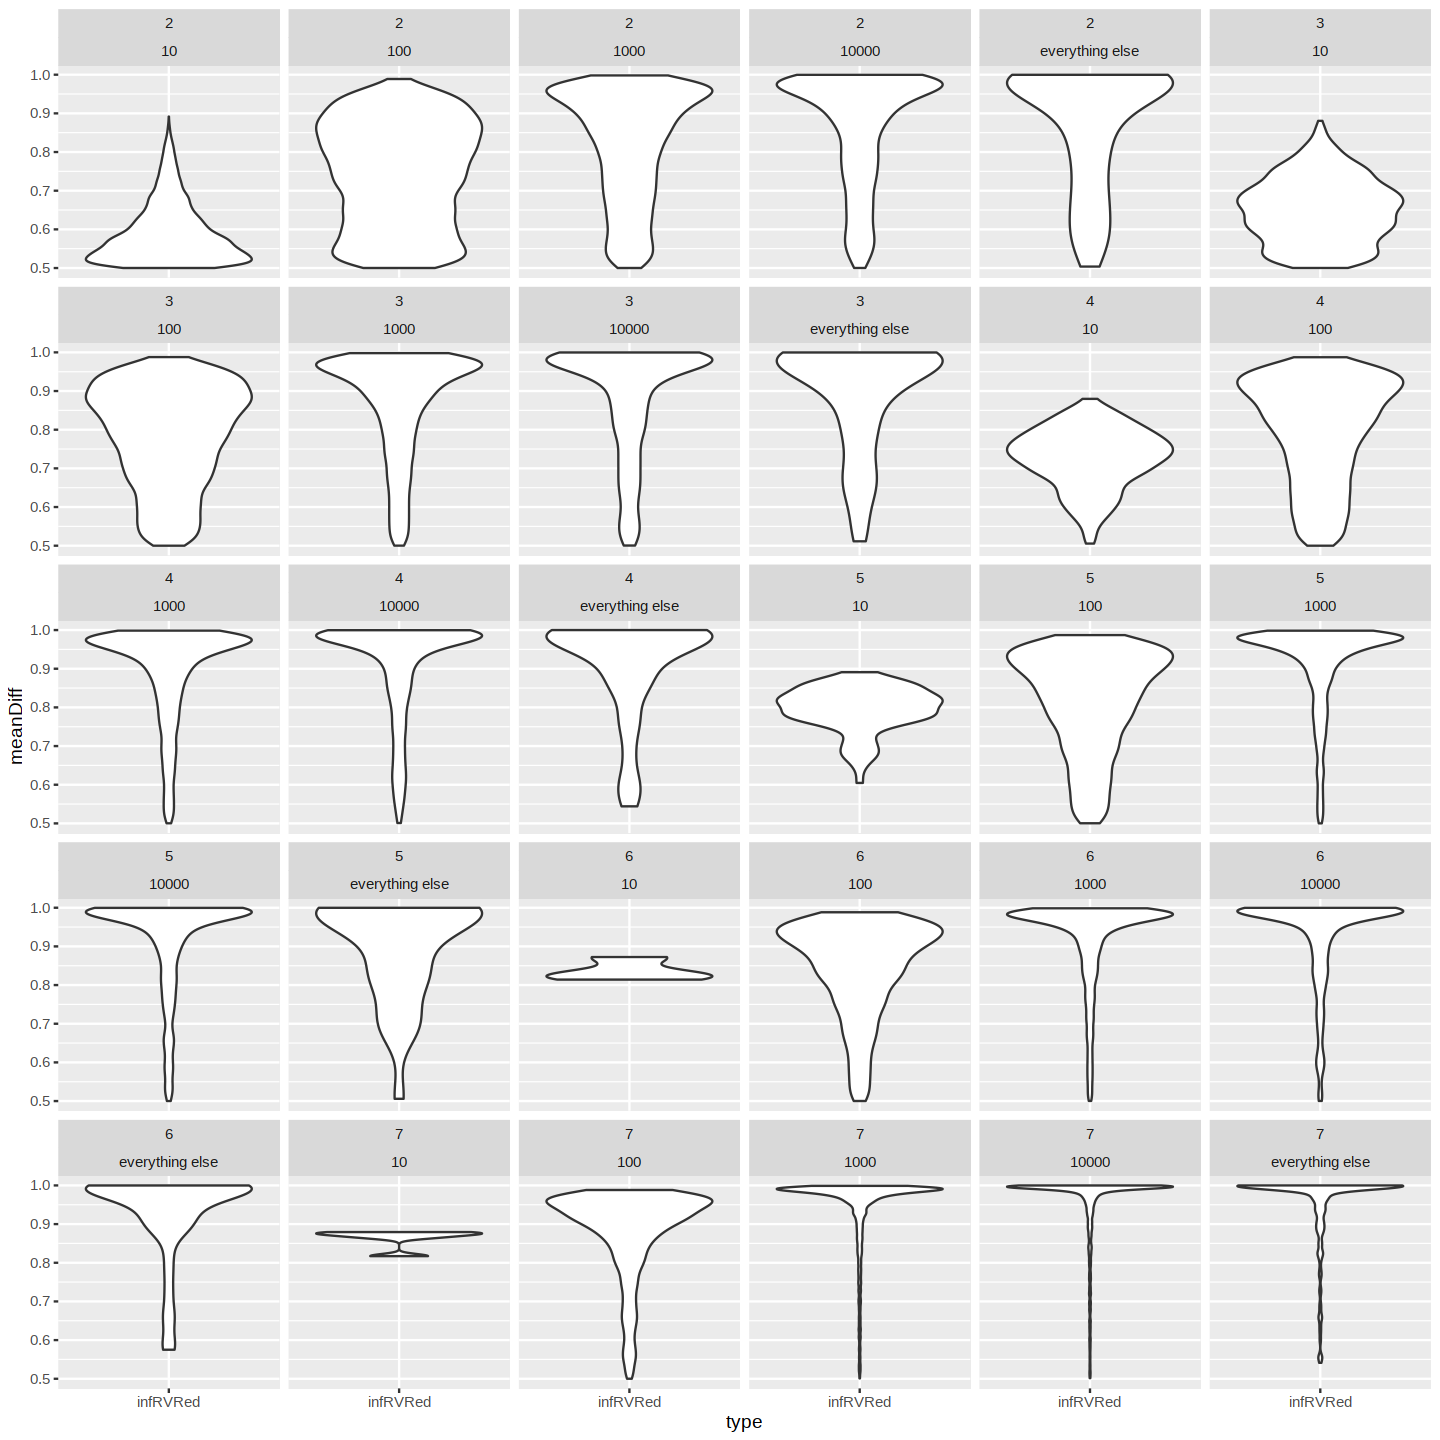

In [33]:
options(repr.plot.width=12, repr.plot.height=12)
ggplot(dfInf, aes(x=type,y=meanDiff)) + geom_violin() + facet_wrap(vars(depth,expCat))

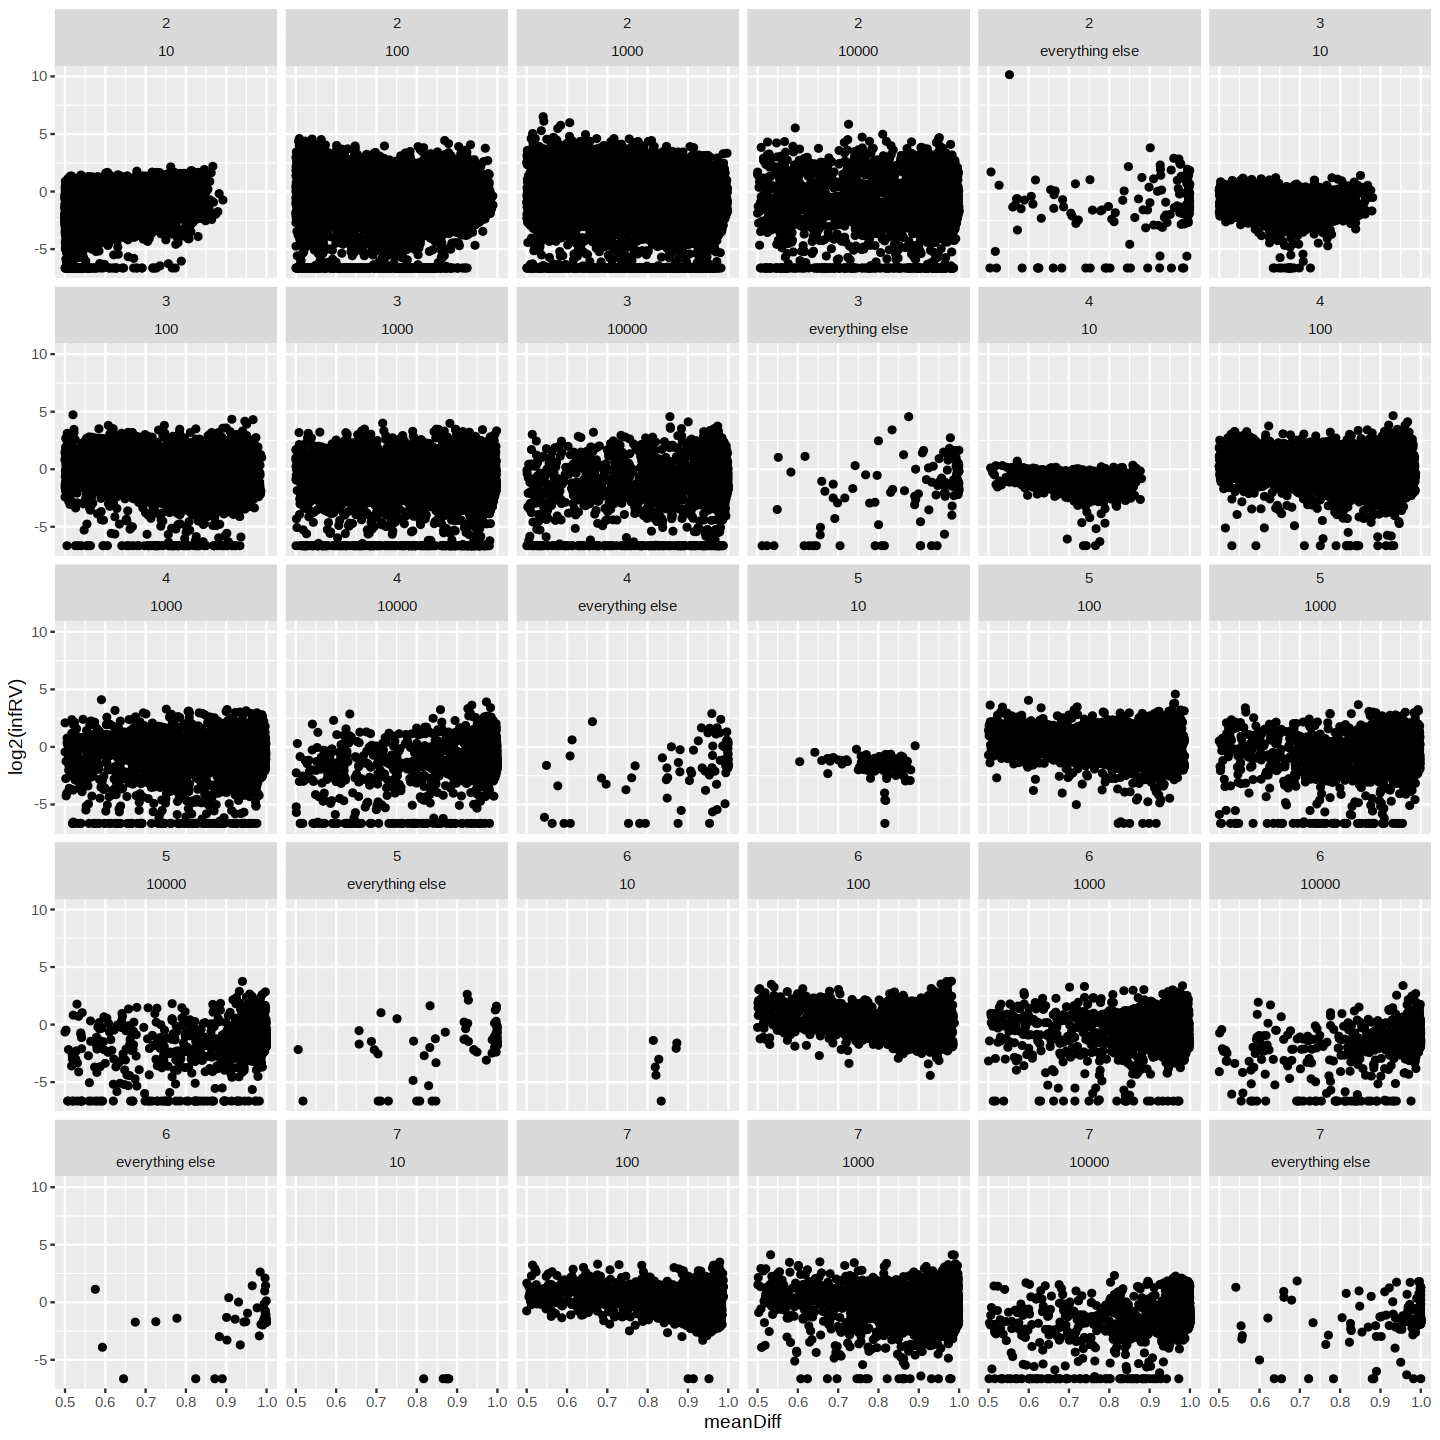

In [34]:
ggplot(dfInf, aes(y=log2(infRV),x=meanDiff)) + geom_point() + facet_wrap(vars(depth,expCat))

In [35]:
mean(meanDiff > 0.8)

[1] 0.5676107

In [36]:
table(modDep)

modDep
    1     2     3     4     5     6     7 
92896 27406 15479  9655  6232  4037  8696 

In [55]:
nd <- which(meanDiff > 0.8)

In [72]:
i <- 60
infMean[childNodes[[nd[i]]]]

ENST00000169551.10  ENST00000584925.1 
         143.42040           16.15755

In [73]:
infMean[nL+1:tr$Nnode][nd[i]]

93001 
159.578

In [74]:
mcols(yAgg)[nL+1:tr$Nnode,1][nd[i]]
mcols(yAgg)[childNodes[[nd[i]]],1]

93001 
0.3302811

ENST00000169551.10  ENST00000584925.1 
         0.3354457          0.5854160

In [59]:
childNodes[[nd[i]]]

[1] 25 26

In [54]:
length(meanDiff)

[1] 71505